Primeras filas del dataset:
                           symboling normalized-losses make  fuel-type  \
0                    <!DOCTYPE HTML>               NaN  NaN        NaN   
1                             <html>               NaN  NaN        NaN   
2                             <head>               NaN  NaN        NaN   
3             <meta charset="utf-8">               NaN  NaN        NaN   
4      <title>Jupyter Server</title>               NaN  NaN        NaN   

   aspiration  num-of-doors  body-style  drive-wheels  engine-location  \
0         NaN           NaN         NaN           NaN              NaN   
1         NaN           NaN         NaN           NaN              NaN   
2         NaN           NaN         NaN           NaN              NaN   
3         NaN           NaN         NaN           NaN              NaN   
4         NaN           NaN         NaN           NaN              NaN   

   wheel-base  ...  engine-size  fuel-system  bore  stroke  compression-ratio  \
0

C:\Users\jonat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


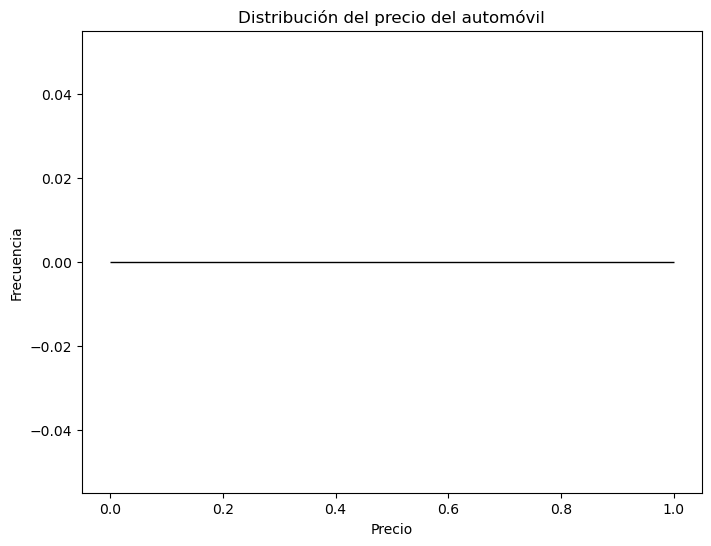

ValueError: could not convert string to float: '<!DOCTYPE HTML>'

<Figure size 1000x800 with 0 Axes>

In [3]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Cargar el dataset
url = "http://localhost:8888/lab/tree/Car%20details%20v3.csv"
names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
data = pd.read_csv(url, names=names)

# 1. Análisis exploratorio de los datos
# Visualizar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

# Resumen estadístico de las variables numéricas
print("\nResumen estadístico:")
print(data.describe())

# Visualización de la distribución del precio
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribución del precio del automóvil')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de las relaciones entre variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

# 2. Preprocesamiento de datos
# Manejar valores faltantes
data = data.replace('?', np.nan)
data = data.dropna()

# Convertir algunas columnas a tipo numérico
numeric_cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
data[numeric_cols] = data[numeric_cols].astype(float)

# 3. Selección de características
# Utilizar selección de características basada en F-regression
X = data.drop('price', axis=1)
y = data['price']
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# Obtener las características seleccionadas y sus puntajes
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print("\nCaracterísticas más relevantes:")
print(feature_scores)

# Seleccionar las características con puntajes más altos
selected_features = feature_scores['Feature'][:5].values
X_selected = X[selected_features]

# 4. Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 5. Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Evaluar el desempeño del modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMétricas de desempeño:")
print("Error cuadrático medio (MSE): {:.2f}".format(mse))
print("Coeficiente de determinación (R^2): {:.2f}".format(r2))

# 7. Realizar gráficas para visualizar los resultados del modelo
# Graficar los valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs Valores predichos')
plt.show()
